In [ ]:
#download the data using the below code into your local setup

import requests
from tqdm import tqdm

url = 'http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz'
file_path = 'BreaKHis_v1.tar.gz'

response = requests.get(url, stream=True)

if response.status_code == 200:


  total_size = int(response.headers.get('content-length', 0))
  progress_bar = tqdm(total=total_size, unit='B', unit_scale=True)

  with open(file_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=1024):
          if chunk:
              file.write(chunk)
              progress_bar.update(len(chunk))

  progress_bar.close()
  print('File downloaded successfully.')
else:

  print('Failed to download the file.')


100%|██████████| 4.27G/4.27G [06:14<00:00, 11.4MB/s]

File downloaded successfully.


In [ ]:
# get all the 400x png files into a folder
import tarfile
import os
import shutil
import io

# Define the tar file
tar_file_path = 'BreaKHis_v1.tar.gz'

# Define the directory to store the extracted files
output_dir = 'extracted_images_400x'
os.makedirs(output_dir, exist_ok=True)

# Open the tar file
tar = tarfile.open(tar_file_path)

# Iterate over each member in the tar file
for member in tar.getmembers():
    if '400X' in member.name and member.name.endswith('.png'):
        # Use extractfile() to get a file-like object for the file data
        file_data = tar.extractfile(member)

        if file_data is not None:
            # Get the base filename (without directories)
            base_filename = os.path.basename(member.name)
            # Define the target file path in the output_dir
            target_path = os.path.join(output_dir, base_filename)

            # Write the file data to the new file
            with open(target_path, 'wb') as f:
                shutil.copyfileobj(file_data, f)

# Close the tar file
tar.close()


In [ ]:
!ls extracted_images_400x | head -n 20


SOB_B_A-14-22549AB-400-001.png
SOB_B_A-14-22549AB-400-002.png
SOB_B_A-14-22549AB-400-003.png
SOB_B_A-14-22549AB-400-004.png
SOB_B_A-14-22549AB-400-005.png
SOB_B_A-14-22549AB-400-006.png
SOB_B_A-14-22549AB-400-007.png
SOB_B_A-14-22549AB-400-008.png
SOB_B_A-14-22549AB-400-009.png
SOB_B_A-14-22549AB-400-010.png
SOB_B_A-14-22549AB-400-011.png
SOB_B_A-14-22549AB-400-012.png
SOB_B_A-14-22549AB-400-013.png
SOB_B_A-14-22549AB-400-014.png
SOB_B_A-14-22549AB-400-015.png
SOB_B_A-14-22549AB-400-016.png
SOB_B_A-14-22549AB-400-017.png
SOB_B_A-14-22549AB-400-018.png
SOB_B_A-14-22549AB-400-019.png
SOB_B_A-14-22549AB-400-020.png


In [ ]:
#creating a dataframe that has the patient id, file path, type

import os
import pandas as pd

# Define the directory where the files are stored
directory = 'extracted_images_400x'

# Get the list of file names
filenames = os.listdir(directory)

# Create a DataFrame from the file names
df = pd.DataFrame(filenames, columns=['filename'])

# Extract the type (M or B), patient ID and image ID from the filename
df['type'] = df['filename'].str.split('_', expand=True)[1]
df['patient_ID'] = df['filename'].str.split('-', expand=True)[2]

# Display the DataFrame
df


,filename,type,patient_ID
0,SOB_M_DC-14-14946-400-020.png,M,14946
1,SOB_B_PT-14-21998AB-400-012.png,B,21998AB
2,SOB_B_F-14-25197-400-042.png,B,25197
3,SOB_B_A-14-29960CD-400-011.png,B,29960CD
4,SOB_M_DC-14-10926-400-009.png,M,10926
...,...,...,...
1815,SOB_M_DC-14-18650-400-011.png,M,18650
1816,SOB_B_PT-14-22704-400-010.png,B,22704
1817,SOB_M_DC-14-9461-400-015.png,M,9461
1818,SOB_M_LC-14-15570-400-031.png,M,15570


In [ ]:
import numpy as np

# Get a list of unique patient IDs for each type
malignant_ids = df[df['type'] == 'M']['patient_ID'].unique()
benign_ids = df[df['type'] == 'B']['patient_ID'].unique()

# Function to split patient IDs into train, validation, and test
def split_ids(ids):
    np.random.shuffle(ids)
    train_size = int(len(ids) * 0.8)
    val_size = int(len(ids) * 0.1)
    train_ids = ids[:train_size]
    val_ids = ids[train_size:train_size + val_size]
    test_ids = ids[train_size + val_size:]
    return train_ids, val_ids, test_ids

# Split patient IDs for each type
train_m_ids, val_m_ids, test_m_ids = split_ids(malignant_ids)
train_b_ids, val_b_ids, test_b_ids = split_ids(benign_ids)

# Concatenate train, validation, and test patient IDs
train_patient_ids = np.concatenate([train_m_ids, train_b_ids])
val_patient_ids = np.concatenate([val_m_ids, val_b_ids])
test_patient_ids = np.concatenate([test_m_ids, test_b_ids])

# Get corresponding dataframes
train_df = df[df['patient_ID'].isin(train_patient_ids)]
val_df = df[df['patient_ID'].isin(val_patient_ids)]
test_df = df[df['patient_ID'].isin(test_patient_ids)]


In [ ]:
print('file name is', 'train_df')
for column in train_df.columns:
    print(column, train_df[column].nunique())


print('file name is', 'val_df')
for column in val_df.columns:
    print(column, val_df[column].nunique())


print('file name is', 'test_df')
for column in test_df.columns:
    print(column, test_df[column].nunique())


file name is train_df
filename 1451
type 2
patient_ID 64
file name is val_df
filename 148
type 2
patient_ID 7
file name is test_df
filename 221
type 2
patient_ID 10


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define image size and path
img_size = (700, 460)
batch_size = 32
directory = 'extracted_images_400x'

# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # assuming 80-20 split for train-val

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=directory,
    x_col='filename',
    y_col='type',
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size,
    subset='training')

val_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=directory,
    x_col='filename',
    y_col='type',
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size,
    subset='validation')

# Load pre-trained VGG16 model
# base_model = VGG16(input_shape=img_size + (3,), include_top=False, weights='imagenet')

# Freeze the pre-trained model
# for layer in base_model.layers:
#    layer.trainable = False

# Create a new model on top
# model = Sequential([
#    base_model,
#    Flatten(),
 #   Dense(1, activation='sigmoid')
#])

# Compile the model
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(train_generator, validation_data=val_generator, epochs=10)


Found 1161 validated image filenames belonging to 2 classes.
Found 290 validated image filenames belonging to 2 classes.


## CNN *Baseline*

In [ ]:
import tensorflow as tf
from functools import partial
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# Define the standard CNN model
n_filters = 12  # Base number of convolutional filters

def make_standard_classifier(n_outputs=1):
    Conv2D = partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
    BatchNormalization = tf.keras.layers.BatchNormalization
    Flatten = tf.keras.layers.Flatten
    Dense = partial(tf.keras.layers.Dense, activation='relu')

    model = tf.keras.Sequential([
        Conv2D(filters=1*n_filters, kernel_size=5, strides=2),
        BatchNormalization(),

        Conv2D(filters=2*n_filters, kernel_size=5, strides=2),
        BatchNormalization(),

        Conv2D(filters=4*n_filters, kernel_size=3, strides=2),
        BatchNormalization(),

        Conv2D(filters=6*n_filters, kernel_size=3, strides=2),
        BatchNormalization(),

        Flatten(),
        Dense(512),
        Dense(n_outputs, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    return model


In [ ]:

# Create the standard CNN model
standard_classifier = make_standard_classifier()

In [ ]:

# Compile the model
standard_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Define callbacks
early_stop = EarlyStopping(patience=3)
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1
lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
standard_classifier.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop, lr_schedule])

Epoch 1/10
36/36 [==============================] - 134s 4s/step - loss: 2.2551 - accuracy: 0.6690 - val_loss: 1.6542 - val_accuracy: 0.3592 - lr: 0.0010
Epoch 2/10
36/36 [==============================] - 135s 4s/step - loss: 0.3593 - accuracy: 0.8046 - val_loss: 2.1322 - val_accuracy: 0.3592 - lr: 0.0010
Epoch 3/10
36/36 [==============================] - 130s 4s/step - loss: 0.1974 - accuracy: 0.9049 - val_loss: 3.1268 - val_accuracy: 0.3592 - lr: 0.0010
Epoch 4/10
36/36 [==============================] - 154s 4s/step - loss: 0.0950 - accuracy: 0.9692 - val_loss: 1.4144 - val_accuracy: 0.3873 - lr: 0.0010
Epoch 5/10
36/36 [==============================] - 130s 4s/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 1.0686 - val_accuracy: 0.4683 - lr: 0.0010
Epoch 6/10
36/36 [==============================] - 142s 4s/step - loss: 0.0344 - accuracy: 0.9965 - val_loss: 0.9202 - val_accuracy: 0.5176 - lr: 1.0000e-04
Epoch 7/10
36/36 [==============================] - 130s 4s/step - loss:

## MobileNetV2 Transfer Learning

In [ ]:
# importing the libraries
from typing import List, Set, Dict, Tuple, Optional
from PIL import Image
import os
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

# get the pre-trained model and freeze the weights
base_model = tf.keras.applications.MobileNetV2(input_shape=(700, 460, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

# define our Pre-Trained Neural Network Model
transfer_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5),
])

Epoch 1/15
37/37 [==============================] - 167s 4s/step - loss: 0.8942 - accuracy: 0.5711 - val_loss: 0.6536 - val_accuracy: 0.6517
Epoch 2/15
37/37 [==============================] - 158s 4s/step - loss: 0.7347 - accuracy: 0.6115 - val_loss: 0.6524 - val_accuracy: 0.6517
Epoch 3/15
37/37 [==============================] - 162s 4s/step - loss: 0.6905 - accuracy: 0.6391 - val_loss: 0.6512 - val_accuracy: 0.6517
Epoch 4/15
37/37 [==============================] - 194s 5s/step - loss: 0.6857 - accuracy: 0.6408 - val_loss: 0.6817 - val_accuracy: 0.6517
Epoch 5/15
37/37 [==============================] - 172s 5s/step - loss: 0.6840 - accuracy: 0.6434 - val_loss: 0.6674 - val_accuracy: 0.6517
Epoch 6/15
37/37 [==============================] - 163s 4s/step - loss: 0.6771 - accuracy: 0.6253 - val_loss: 0.6510 - val_accuracy: 0.6517
Epoch 7/15
37/37 [==============================] - 166s 4s/step - loss: 0.6656 - accuracy: 0.6546 - val_loss: 0.6548 - val_accuracy: 0.6517
Epoch 8/15
37

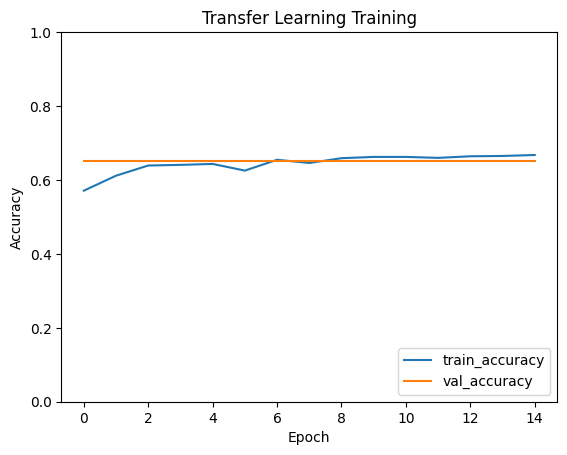

In [ ]:
#@title Run to Compile & Finetune the Pre-Trained Model (val_acc didn't change)
if __name__ == "__main__":
    tf.random.set_seed(17)

    # compile model
    transfer_model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
    # train model
    EPOCH = 15
    transfer_history = transfer_model.fit(train_generator, epochs=EPOCH,
                    validation_data=val_generator)

    # visualize the training history and get the performance
    plt.plot(transfer_history.history['accuracy'], label='train_accuracy')
    plt.plot(transfer_history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title("Transfer Learning Training")
    plt.legend(loc='lower right')

## Siamese Model Demo 1 (overfitting)

In [ ]:
# importing the libraries
from typing import List, Set, Dict, Tuple, Optional
from PIL import Image
import os
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

def create_siamese_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
    base_model.trainable = False

    input_a = Input(shape=img_size + (3,))
    input_b = Input(shape=img_size + (3,))

    processed_a = base_model(input_a)
    processed_b = base_model(input_b)

    # concatenate the output of two base models
    concatenated = Concatenate()([GlobalAveragePooling2D()(processed_a), GlobalAveragePooling2D()(processed_b)])

    # add more layers for final prediction
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_a, input_b], outputs=output)

    return model

siamese_model = create_siamese_model()

Epoch 1/15
1/1 [==============================] - 19s 19s/step - loss: 0.7117 - accuracy: 0.4062 - val_loss: 0.6784 - val_accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 12s 12s/step - loss: 0.5867 - accuracy: 0.5938 - val_loss: 0.9119 - val_accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 28s 28s/step - loss: 0.5947 - accuracy: 0.5625 - val_loss: 0.7248 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 17s 17s/step - loss: 0.4228 - accuracy: 0.9062 - val_loss: 0.6475 - val_accuracy: 0.6562
Epoch 5/15
1/1 [==============================] - 12s 12s/step - loss: 0.3738 - accuracy: 0.9062 - val_loss: 0.6714 - val_accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 12s 12s/step - loss: 0.3305 - accuracy: 0.9375 - val_loss: 0.7191 - val_accuracy: 0.5938
Epoch 7/15
1/1 [==============================] - 12s 12s/step - loss: 0.2538 - accuracy: 0.9062 - val_loss: 0.8754 - val_accuracy: 0.5312
Epoch 8/15
1/1 [===========

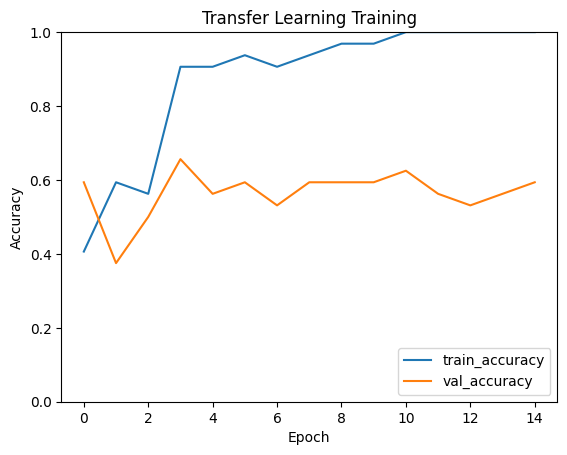

In [ ]:
#@title Run to Compile & Finetune the Pre-Trained Model
if __name__ == "__main__":
    tf.random.set_seed(17)

    # compile model
    siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    EPOCH = 15
    transfer_history = siamese_model.fit(
    [train_generator.next()[0], train_generator.next()[0]],  # provide two inputs (anchor and positive)
     train_generator.next()[1],
     validation_data=(
        [val_generator.next()[0], val_generator.next()[0]],
        val_generator.next()[1]
    ),
    epochs=EPOCH
)

    # visualize the training history and get the performance
    plt.plot(transfer_history.history['accuracy'], label='train_accuracy')
    plt.plot(transfer_history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title("Transfer Learning Training")
    plt.legend(loc='lower right')